In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [2]:
with h5py.File("C:\MessdatenStoeckach\\2017-04-04\harmonics_phase_1_2017-04-04.h5", "r") as f:
    sh = np.array(f["tenperiodtable"]["harmonics_u"][:,38:], dtype=np.float32)

In [3]:
sh.shape

(432007, 2960)

In [9]:
newlength = sh.shape[0]//3000

In [10]:
newlength

144

In [12]:
def groupedAvg(myArray, N=2):
    result = np.cumsum(myArray, 0)[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]
    return result

In [16]:
%%time
shshort = groupedAvg(sh, 3000)

Wall time: 1min 14s


In [71]:
HDF5_dir ="C:\MessdatenStoeckach\\"
dates = os.listdir(HDF5_dir)
phases = ["0","1","2","3"]

In [72]:
%%time
dayly_aggregated = np.empty([0,2960])
for date in dates:
    print(date)
    for phase in phases:
        print(phase)
        with h5py.File(HDF5_dir + date + "\\" + "harmonics_phase_" + phase + "_" + date + ".h5", 'r') as f:
            sh = np.array(f["tenperiodtable"]["harmonics_u"][:,38:], dtype=np.float32)
        sh_agg = groupedAvg(sh, 3000)
        sh_agg = sh_agg*230
        sh_agg[sh_agg<1e-4] = 1e-4
        sh_agg = 20*np.log10(sh_agg/1e-6)
        dayly_aggregated = np.vstack([dayly_aggregated, sh_agg])
        del sh
        del sh_agg

2017-04-01
0
1
2
3
2017-04-02
0
1
2
3
2017-04-18
0
1
2
3
2017-04-24
0
1
2
3
2017-04-28
0
1
2
3
Wall time: 41min 1s


In [73]:
no_agg_mean = np.array(pd.read_excel('C:\\MDS_alle\\overall_mean_excel.xlsx', index_col=0)[0])

In [74]:
no_agg_mean

array([125.42963326, 143.11342224, 127.76456126, ...,  78.65469587,
        78.65431808,  78.65392587])

In [75]:
agg_mean = dayly_aggregated.mean(axis=0)

In [76]:
agg_mean

array([127.49158266, 143.21193074, 128.83236116, ..., 102.14728863,
       102.14670481, 102.14366149])

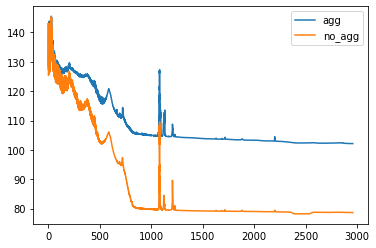

In [81]:
plt.plot(agg_mean, label="agg")
plt.plot(no_agg_mean, label="no_agg")
plt.legend()
plt.show()

In [86]:
HDF5_dir ="C:\MessdatenStoeckach\\"
dates = os.listdir(HDF5_dir)
phases = ["0"]

In [93]:
%%time
dayly_aggregated = np.empty([0,2960])
for date in dates:
    print(date)
    for phase in phases:
        print(phase)
        with h5py.File(HDF5_dir + date + "\\" + "harmonics_phase_" + phase + "_" + date + ".h5", 'r') as f:
            sh = np.array(f["tenperiodtable"]["harmonics_u"][:,38:], dtype=np.float32)
        sh = sh*230
        sh[sh<1e-4] = 1e-4
        sh_agg = groupedAvg(sh, 3000)
        sh_agg = 20*np.log10(sh_agg/1e-6)
        
        dayly_aggregated = np.vstack([dayly_aggregated, sh_agg])
        del sh
        del sh_agg

2017-04-24
0
Wall time: 1min 51s


In [98]:
%%time
dayly_no_aggregated = np.empty([0,2960])
for date in dates:
    print(date)
    for phase in phases:
        print(phase)
        with h5py.File(HDF5_dir + date + "\\" + "harmonics_phase_" + phase + "_" + date + ".h5", 'r') as f:
            sh = np.array(f["tenperiodtable"]["harmonics_u"][:,38:], dtype=np.float32)
        sh = sh*230
        sh[sh<1e-4] = 1e-4
        sh = 20*np.log10(sh/1e-6)
        
        dayly_no_aggregated = np.vstack([dayly_aggregated, sh])
        del sh
no_agg_mean = dayly_no_aggregated.mean(axis=0)

2017-04-24
0
Wall time: 2min 20s


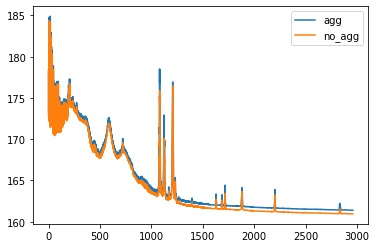

In [99]:
plt.plot(agg_mean2, label="agg")
plt.plot(no_agg_mean, label="no_agg")
plt.legend()
plt.show()